In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import copy
%matplotlib inline

In [2]:
# Importing the data set
df=pd.read_csv("previous_application.csv")
pd.set_option('display.max_columns', 150) # to display all the columns

In [3]:
'''
Exploring the data
'''
print("*****INFO******")
print(df.info())
print("\n*****SHAPE******")
print(df.shape)
print("\n*****COLUMNS******")
print(df.columns)

*****INFO******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null ob

In [4]:
'''
Size of original dataset is (1670214, 37)
Evaluating Percentage of Null values across various columns in the dataset
Also removing all those columns who have more then 30% null values as they will not be of much use in our analysis
'''
df = df[df.columns[ round(100*(df.isnull().sum()/len(df.index)), 2) < 30 ]]

'''
Evaluating Percentage of Null values across various rows in the dataset
Also removing all those rows who have more then 30% null values as they will not be of much use in our analysis
'''
print(len(df[round(100*(df.isnull().sum(axis=1)/df.shape[1]), 2) > 30 ].index))


0


In [5]:
'''
There are no rows in dataset which has more then 30% missing values
Finding final Dataset shape after removing null values
'''
print(df.shape)

(1670214, 26)


Size of original dataset is (1670214, 37)
Size of updated dataset is  (1670214, 26)
which proves that we have removed columns in which high number of column values were empty, but even then we have plenty 
of data to analyze.

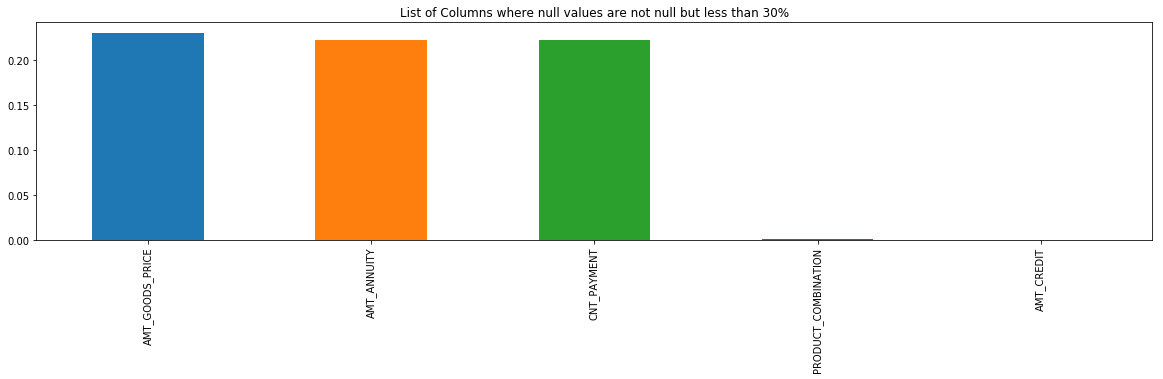

In [6]:
'''
Visualising columns with higher number of missing values
'''
Columns_with_Missing_values = df.isnull().mean()
# Only taking those columns where missing values are present
Columns_with_Missing_values = Columns_with_Missing_values[Columns_with_Missing_values.values > 0]
plt.figure(figsize=(20,4))
Columns_with_Missing_values.sort_values(ascending=False).plot(kind='bar')
plt.title('List of Columns where null values are not null but less than 30%')
plt.show()


In [7]:
'''
Now, lets try to impute values in those columns who have less then 30% missing values.
First, lets print such columns
'''
df[df.columns[ round(100*(df.isnull().sum()/len(df.index)), 2) > 0 ]].head()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT,PRODUCT_COMBINATION
0,1730.430,17145.0,12.0,POS mobile with interest
1,25188.615,607500.0,36.0,Cash X-Sell: low
2,15060.735,112500.0,12.0,Cash X-Sell: high
3,47041.335,450000.0,12.0,Cash X-Sell: middle
4,31924.395,337500.0,24.0,Cash Street: high


In [8]:
# AMT_GOODS_PRICE is of float datatype
print("Total number of Missing values in column is ", df.loc[:, "AMT_ANNUITY"].isnull().sum())
# Imputing with mean is risky as outiers would always push mean to a faulty value
print("Standard Deviation of the column is ", df.loc[:, "AMT_ANNUITY"].std())
print("Mean of the column is ", df.loc[:, "AMT_ANNUITY"].mean())
print("Median of the column is", df.loc[:, "AMT_ANNUITY"].median())

Total number of Missing values in column is  372235
Standard Deviation of the column is  14782.137334702156
Mean of the column is  15955.120659450406
Median of the column is 11250.0


In [9]:
# A high standard deviation indicates that the data points are spread out over a wider range of values.
# So, we will be using Median to impute missing values
df.loc[np.isnan(df["AMT_ANNUITY"]), ["AMT_ANNUITY"]] = df["AMT_ANNUITY"].median()

In [10]:
# Confirming whether all the NaN have been replacd with median
print(df.loc[:, "AMT_ANNUITY"].isnull().sum())

0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a6c057bba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6c037be10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6c01b9da0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6800be048>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6800be860>],
 'means': []}

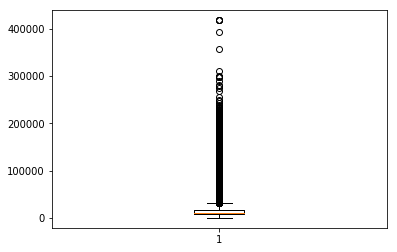

In [11]:
# Plotting the boxplot
plt.boxplot(df["AMT_ANNUITY"])

In [12]:
# PRODUCT_COMBINATION is a Categorical value since it only takes small set of values
df["PRODUCT_COMBINATION"] = df["PRODUCT_COMBINATION"].astype("category")
df["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [13]:
# Since Cash has largest number of entries in the column, we would be imputing missing values with it.
df.loc[pd.isnull(df["PRODUCT_COMBINATION"]), ["PRODUCT_COMBINATION"]] = "Cash"
# Checking missing values of column after imputing
print("Missing entries in column are ", df.loc[:, "PRODUCT_COMBINATION"].isnull().sum())

Missing entries in column are  0


In [14]:
'''
We took out rest of the columns which has missing values. We will analyze their min/max/sd values and based on that
we will be imputing NaN value(s)
'''
print("Min value is : ")
print(df[["AMT_GOODS_PRICE", "CNT_PAYMENT"]].min())

print("\nMax value is : ")
print(df[["AMT_GOODS_PRICE", "CNT_PAYMENT"]].max())

print("\nStandard Deviation is : ")
print(df[["AMT_GOODS_PRICE", "CNT_PAYMENT"]].std())

Min value is : 
AMT_GOODS_PRICE    0.0
CNT_PAYMENT        0.0
dtype: float64

Max value is : 
AMT_GOODS_PRICE    6905160.0
CNT_PAYMENT             84.0
dtype: float64

Standard Deviation is : 
AMT_GOODS_PRICE    315396.557937
CNT_PAYMENT            14.567288
dtype: float64


In [15]:
# After analysing the data, it seems that outliers might be present in following columns.
# Example Max value is hugely greater then normal values, and comparebly standard deviation also seems large
# So imputing with median
columns = ["AMT_GOODS_PRICE"]
for col in columns:
    df.loc[np.isnan(df[col]), [col]] = df[col].median()

In [16]:
# After analysing the data, it seems that outliers are not present in following columns.
# Example Max value feels like within range, and standard deviation is also less
# So imputing with mean
columns = ["CNT_PAYMENT"]
for col in columns:
    df.loc[np.isnan(df[col]), [col]] = df[col].mean()

In [17]:
'''
Since columns have been imputed, lets check whether any column is still left with NaN values
'''
df[df.columns[ round(100*(df.isnull().sum()/len(df.index)), 2) > 0 ]].head()

""
0
1
2
3
4


In [18]:
print("Shape of the dataframe is ", df.shape)
print("\nRows having missing values in rows\n", df[df.isnull().sum(axis=1) > 0].index)
print("\nRows having missing values in rows\n", len(df[df.isnull().sum(axis=1) > 0].index))

Shape of the dataframe is  (1670214, 26)

Rows having missing values in rows
 Int64Index([1127152], dtype='int64')

Rows having missing values in rows
 1


In [19]:
'''
There is only 1 rows which contains missing values.
Since, we have already imputed missing columns, and we have more then 3 lakhs rows, so we can delete such rows
'''
df=df[df.isnull().sum(axis=1) == 0]
print("Updated Shape of the dataframe is ", df.shape)

Updated Shape of the dataframe is  (1670213, 26)


In [20]:
# DataFrame info about columns. Lets make sure that type of data frame columns is correctly updated
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670213 entries, 0 to 1670213
Data columns (total 26 columns):
SK_ID_PREV                     1670213 non-null int64
SK_ID_CURR                     1670213 non-null int64
NAME_CONTRACT_TYPE             1670213 non-null object
AMT_ANNUITY                    1670213 non-null float64
AMT_APPLICATION                1670213 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1670213 non-null float64
WEEKDAY_APPR_PROCESS_START     1670213 non-null object
HOUR_APPR_PROCESS_START        1670213 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670213 non-null object
NFLAG_LAST_APPL_IN_DAY         1670213 non-null int64
NAME_CASH_LOAN_PURPOSE         1670213 non-null object
NAME_CONTRACT_STATUS           1670213 non-null object
DAYS_DECISION                  1670213 non-null int64
NAME_PAYMENT_TYPE              1670213 non-null object
CODE_REJECT_REASON             1670213 non-null object
NAME_CLI

In [21]:
'''
After analysing following columns, they seem to be of category type
'''
category_columns = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", 
                    "NAME_CASH_LOAN_PURPOSE", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", 
                    "CODE_REJECT_REASON", "NAME_CLIENT_TYPE", "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE",
                    "CHANNEL_TYPE", "NAME_SELLER_INDUSTRY", "NAME_YIELD_GROUP"]
for col in category_columns:
    df[col] = df[col].astype('category')

In [22]:
# DataFrame info about columns. Lets make sure that type of data frame columns is correctly updated
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670213 entries, 0 to 1670213
Data columns (total 26 columns):
SK_ID_PREV                     1670213 non-null int64
SK_ID_CURR                     1670213 non-null int64
NAME_CONTRACT_TYPE             1670213 non-null category
AMT_ANNUITY                    1670213 non-null float64
AMT_APPLICATION                1670213 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1670213 non-null float64
WEEKDAY_APPR_PROCESS_START     1670213 non-null category
HOUR_APPR_PROCESS_START        1670213 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670213 non-null category
NFLAG_LAST_APPL_IN_DAY         1670213 non-null int64
NAME_CASH_LOAN_PURPOSE         1670213 non-null category
NAME_CONTRACT_STATUS           1670213 non-null category
DAYS_DECISION                  1670213 non-null int64
NAME_PAYMENT_TYPE              1670213 non-null category
CODE_REJECT_REASON             1670213 non-null cat

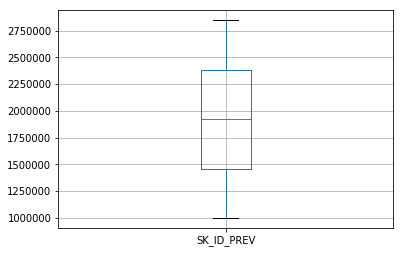

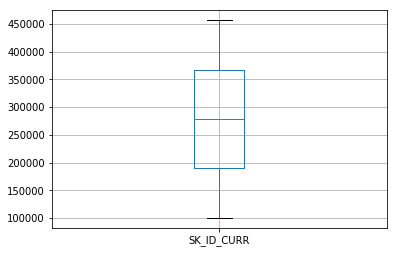

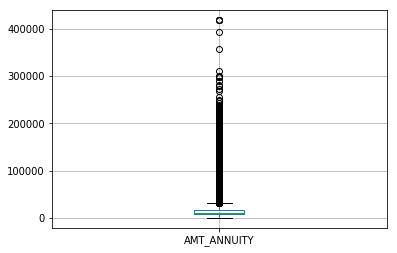

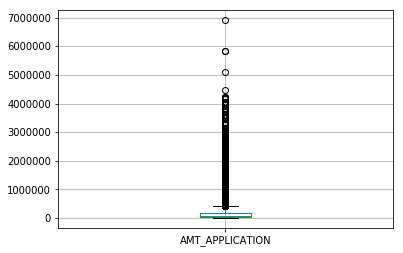

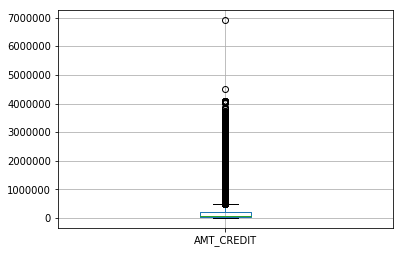

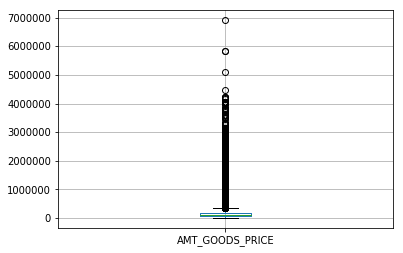

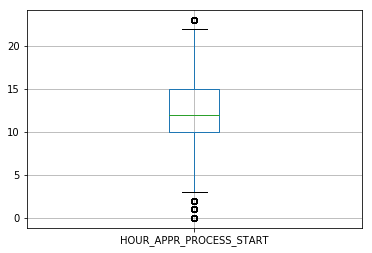

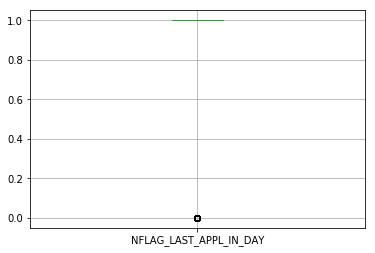

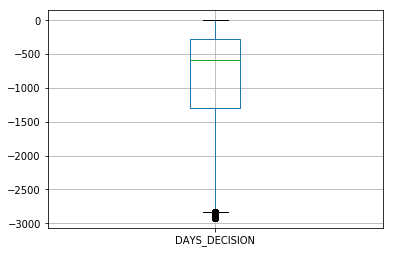

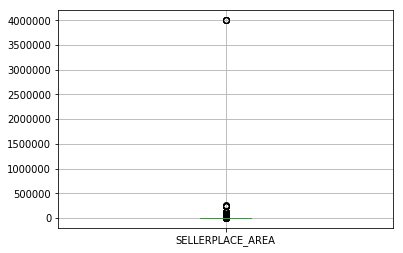

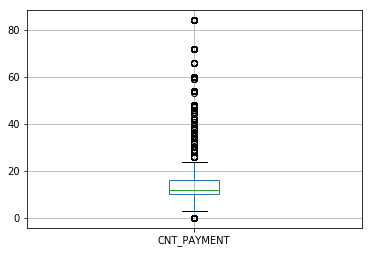

In [23]:
'''
As seen while imputing, there seems to be outlier presents across different numeric columns.
If outliers are removed, they will cause issues in our analysation process.
Lets visualize them through boxplot first
'''
numeric=["float64", "int64"]
for col in df.select_dtypes(include=numeric).columns:
        plt.figure()
        df.boxplot([col])
        plt.show()


In [24]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [25]:
# Setting SK_ID_CURR as the index of the dataframe so that its easier to join and read/analyze data
df.set_index("SK_ID_CURR", inplace=True)
df.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,
271877,2030495,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
108129,2802425,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
122040,2523466,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
176158,2819243,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
202054,1784265,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [26]:
'''
As seen in above figures too, there seems to be many outliers present across columns.
Lets remove outliers present in int and float columns
'''
numeric=["float64", "int64"]
desired_col=[]
for col in df.select_dtypes(include=numeric).columns:
    if col != "SK_ID_CURR":
        desired_col.append(col)
df_excluded = df.loc[:, desired_col]
df_excluded.head()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
SK_ID_CURR,,,,,,,,,,
271877,2030495,1730.430,17145.0,17145.0,17145.0,15,1,-73,35,12.0
108129,2802425,25188.615,607500.0,679671.0,607500.0,11,1,-164,-1,36.0
122040,2523466,15060.735,112500.0,136444.5,112500.0,11,1,-301,-1,12.0
176158,2819243,47041.335,450000.0,470790.0,450000.0,7,1,-512,-1,12.0
202054,1784265,31924.395,337500.0,404055.0,337500.0,9,1,-781,-1,24.0


In [27]:
print("Shape of the dataframe is ", df.shape)
print("\nRows having missing values in rows\n", len(df_excluded[df_excluded.isnull().sum(axis=1) > 0].index))
print("\nRows having missing values in rows\n", df_excluded.isnull().sum() > 0)

Shape of the dataframe is  (1670213, 25)

Rows having missing values in rows
 0

Rows having missing values in rows
 SK_ID_PREV                 False
AMT_ANNUITY                False
AMT_APPLICATION            False
AMT_CREDIT                 False
AMT_GOODS_PRICE            False
HOUR_APPR_PROCESS_START    False
NFLAG_LAST_APPL_IN_DAY     False
DAYS_DECISION              False
SELLERPLACE_AREA           False
CNT_PAYMENT                False
dtype: bool


In [28]:
df_excluded.describe()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06
mean,1.923089e+06,1.490652e+04,1.752340e+05,1.961140e+05,2.011816e+05,1.248418e+01,9.964675e-01,-8.806798e+02,3.139513e+02,1.605409e+01
std,5.325981e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.808629e+05,3.334028e+00,5.932965e-02,7.790999e+02,7.127446e+03,1.284184e+01
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,7.547130e+03,1.872000e+04,2.416050e+04,6.750000e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,1.000000e+01
50%,1.923110e+06,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,1.682406e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,1.605408e+01
max,2.845382e+06,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [29]:
df_excluded.head()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
SK_ID_CURR,,,,,,,,,,
271877,2030495,1730.430,17145.0,17145.0,17145.0,15,1,-73,35,12.0
108129,2802425,25188.615,607500.0,679671.0,607500.0,11,1,-164,-1,36.0
122040,2523466,15060.735,112500.0,136444.5,112500.0,11,1,-301,-1,12.0
176158,2819243,47041.335,450000.0,470790.0,450000.0,7,1,-512,-1,12.0
202054,1784265,31924.395,337500.0,404055.0,337500.0,9,1,-781,-1,24.0


In [30]:
z = np.abs(stats.zscore(df_excluded))
print(z)

[[0.20166439 0.99989194 0.53995871 ... 1.03668362 0.03913764 0.31569408]
 [1.65103169 0.78027644 1.47642063 ... 0.91988213 0.04418854 1.55319778]
 [1.12726133 0.01170327 0.21427018 ... 0.74403812 0.04418854 0.31569408]
 ...
 [1.38292512 0.25692717 0.23907722 ... 0.7795154  0.14816655 0.47143507]
 [1.61940746 0.29709749 0.01627857 ... 0.39060494 0.04418854 0.31569408]
 [0.93067025 0.11571116 0.63107523 ... 0.4008732  0.04418854 2.48764371]]


In [31]:
# Checking whether there are NaN present in z which might cause problems while filtering out outliers
np.argwhere(np.isnan(z))

array([], shape=(0, 2), dtype=int64)

In [32]:
# Lets keep a threshold of 3. Basically if z score is more then 3(after removing sign), then treating it as outlier
# Lets see how many outliers exists
threshold = 3
print(np.where(z > 3))

(array([     23,      23,      23, ..., 1670183, 1670187, 1670188],
      dtype=int64), array([2, 3, 4, ..., 9, 9, 9], dtype=int64))


In [33]:
'''
The first array contains the list of row numbers and second array respective column numbers, 
which mean z[1670183][9] have a Z-score higher than 3.
'''
print(z[1670183][9])

3.4220896467845296


In [34]:
# Removing all the outliers
df_excluded = df_excluded[(z < 3).all(axis=1)]
df_excluded.head()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
SK_ID_CURR,,,,,,,,,,
271877,2030495,1730.430,17145.0,17145.0,17145.0,15,1,-73,35,12.0
108129,2802425,25188.615,607500.0,679671.0,607500.0,11,1,-164,-1,36.0
122040,2523466,15060.735,112500.0,136444.5,112500.0,11,1,-301,-1,12.0
176158,2819243,47041.335,450000.0,470790.0,450000.0,7,1,-512,-1,12.0
202054,1784265,31924.395,337500.0,404055.0,337500.0,9,1,-781,-1,24.0


In [35]:
print("df shape is ", df.shape)
print("df_excluded shape is ", df_excluded.shape)
print("%age of rows deleted during outlier removal process is", round(100*((df.shape[0]-df_excluded.shape[0])/df.shape[0]), 2))
df_excluded_columns = df_excluded.columns
df_columns = df.columns
df_columns_not_present_in_excluded_columns_df = list( set(df_columns) - set(df_excluded_columns) )
df_updated = copy.deepcopy(df_excluded.join(df[df_columns_not_present_in_excluded_columns_df]))
print("\nUpdated Dataframe shape is ", df_updated.shape)

df shape is  (1670213, 25)
df_excluded shape is  (1566483, 10)
%age of rows deleted during outlier removal process is 6.21

Updated Dataframe shape is  (13145307, 25)


In [36]:
df_updated.head()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_SELLER_INDUSTRY,NAME_PORTFOLIO,FLAG_LAST_APPL_PER_CONTRACT,WEEKDAY_APPR_PROCESS_START,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CHANNEL_TYPE,NAME_CLIENT_TYPE,NAME_CONTRACT_TYPE,NAME_PAYMENT_TYPE,PRODUCT_COMBINATION,NAME_YIELD_GROUP,NAME_GOODS_CATEGORY,NAME_CASH_LOAN_PURPOSE,NAME_PRODUCT_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,
100001,1369693,3951.000,24835.5,23787.0,24835.5,13,1,-1740,23,8.0,Connectivity,POS,Y,FRIDAY,Approved,XAP,Country-wide,Refreshed,Consumer loans,Cash through the bank,POS mobile with interest,high,Mobile,XAP,XNA
100002,1038818,9251.775,179055.0,179055.0,179055.0,9,1,-606,500,24.0,Auto technology,POS,Y,SATURDAY,Approved,XAP,Stone,New,Consumer loans,XNA,POS other with interest,low_normal,Vehicles,XAP,XNA
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,XNA,Cash,Y,FRIDAY,Approved,XAP,Credit and cash offices,Repeater,Cash loans,XNA,Cash X-Sell: low,low_normal,XNA,XNA,x-sell
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,Furniture,POS,Y,SUNDAY,Approved,XAP,Stone,Refreshed,Consumer loans,Cash through the bank,POS industry with interest,middle,Furniture,XAP,XNA
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,Consumer electronics,POS,Y,SATURDAY,Approved,XAP,Country-wide,Refreshed,Consumer loans,Cash through the bank,POS household with interest,middle,Consumer Electronics,XAP,XNA


In [37]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13145307 entries, 100001 to 456255
Data columns (total 25 columns):
SK_ID_PREV                     int64
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
HOUR_APPR_PROCESS_START        int64
NFLAG_LAST_APPL_IN_DAY         int64
DAYS_DECISION                  int64
SELLERPLACE_AREA               int64
CNT_PAYMENT                    float64
NAME_SELLER_INDUSTRY           category
NAME_PORTFOLIO                 category
FLAG_LAST_APPL_PER_CONTRACT    category
WEEKDAY_APPR_PROCESS_START     category
NAME_CONTRACT_STATUS           category
CODE_REJECT_REASON             category
CHANNEL_TYPE                   category
NAME_CLIENT_TYPE               category
NAME_CONTRACT_TYPE             category
NAME_PAYMENT_TYPE              category
PRODUCT_COMBINATION            category
NAME_YIELD_GROUP               category
NAME_GOODS_CATEGORY   

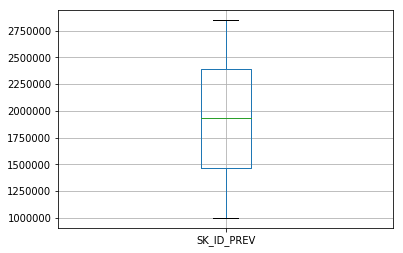

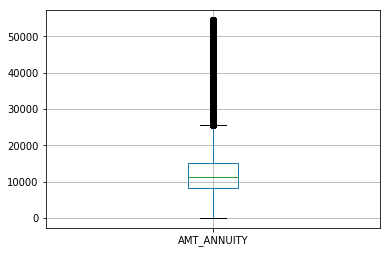

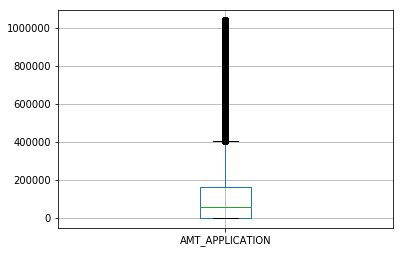

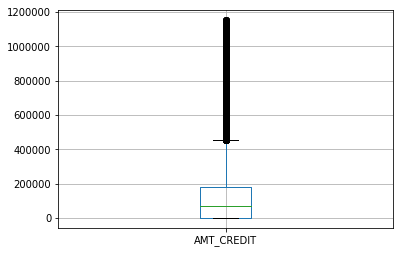

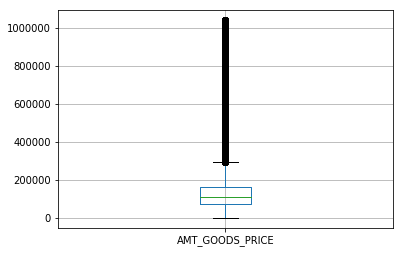

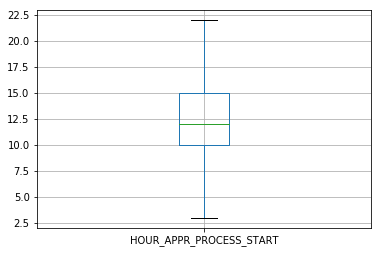

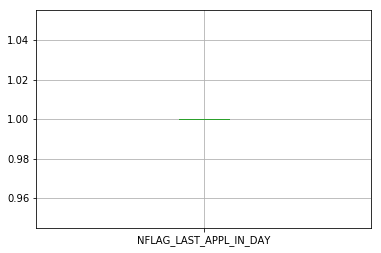

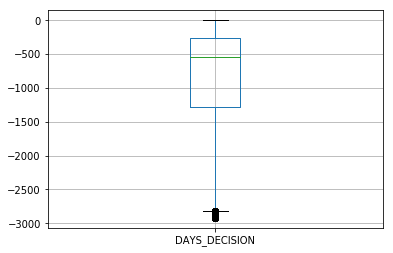

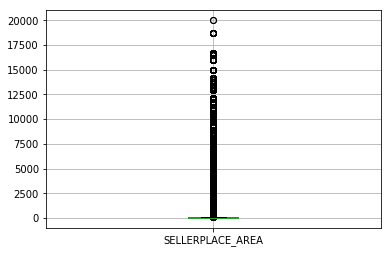

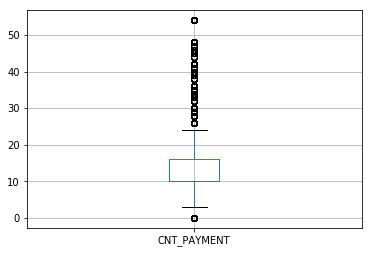

In [38]:
'''
After handling outliers across various columns, lets draw boxplots of numeric columns, and find out if dataframe looks good
Lets visualize them
'''
numeric=["float64", "int64"]
for col in df_updated.select_dtypes(include=numeric).columns:
        plt.figure()
        df_updated.boxplot([col])
        plt.show()


In [39]:
'''
After looking at the boxplots, we can say that outliers have been removed.
There are some columns for which boxplots, still appears very small, but after checking their Standard Deviation, 
we can say that all values greater/less then 3*Standard Deviaton have been removed 
'''
df_updated.head()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_SELLER_INDUSTRY,NAME_PORTFOLIO,FLAG_LAST_APPL_PER_CONTRACT,WEEKDAY_APPR_PROCESS_START,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CHANNEL_TYPE,NAME_CLIENT_TYPE,NAME_CONTRACT_TYPE,NAME_PAYMENT_TYPE,PRODUCT_COMBINATION,NAME_YIELD_GROUP,NAME_GOODS_CATEGORY,NAME_CASH_LOAN_PURPOSE,NAME_PRODUCT_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,
100001,1369693,3951.000,24835.5,23787.0,24835.5,13,1,-1740,23,8.0,Connectivity,POS,Y,FRIDAY,Approved,XAP,Country-wide,Refreshed,Consumer loans,Cash through the bank,POS mobile with interest,high,Mobile,XAP,XNA
100002,1038818,9251.775,179055.0,179055.0,179055.0,9,1,-606,500,24.0,Auto technology,POS,Y,SATURDAY,Approved,XAP,Stone,New,Consumer loans,XNA,POS other with interest,low_normal,Vehicles,XAP,XNA
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,XNA,Cash,Y,FRIDAY,Approved,XAP,Credit and cash offices,Repeater,Cash loans,XNA,Cash X-Sell: low,low_normal,XNA,XNA,x-sell
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,Furniture,POS,Y,SUNDAY,Approved,XAP,Stone,Refreshed,Consumer loans,Cash through the bank,POS industry with interest,middle,Furniture,XAP,XNA
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,Consumer electronics,POS,Y,SATURDAY,Approved,XAP,Country-wide,Refreshed,Consumer loans,Cash through the bank,POS household with interest,middle,Consumer Electronics,XAP,XNA


In [40]:
'''
Lets derive some additional metrics which might prove helpful in during analysing process
'''
df_updated["Credit_Vs_Annuity"] = round(df_updated["AMT_CREDIT"] / df_updated["AMT_ANNUITY"], 2)
df_updated.head()


,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_SELLER_INDUSTRY,NAME_PORTFOLIO,FLAG_LAST_APPL_PER_CONTRACT,WEEKDAY_APPR_PROCESS_START,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CHANNEL_TYPE,NAME_CLIENT_TYPE,NAME_CONTRACT_TYPE,NAME_PAYMENT_TYPE,PRODUCT_COMBINATION,NAME_YIELD_GROUP,NAME_GOODS_CATEGORY,NAME_CASH_LOAN_PURPOSE,NAME_PRODUCT_TYPE,Credit_Vs_Annuity
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,1369693,3951.000,24835.5,23787.0,24835.5,13,1,-1740,23,8.0,Connectivity,POS,Y,FRIDAY,Approved,XAP,Country-wide,Refreshed,Consumer loans,Cash through the bank,POS mobile with interest,high,Mobile,XAP,XNA,6.02
100002,1038818,9251.775,179055.0,179055.0,179055.0,9,1,-606,500,24.0,Auto technology,POS,Y,SATURDAY,Approved,XAP,Stone,New,Consumer loans,XNA,POS other with interest,low_normal,Vehicles,XAP,XNA,19.35
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,XNA,Cash,Y,FRIDAY,Approved,XAP,Credit and cash offices,Repeater,Cash loans,XNA,Cash X-Sell: low,low_normal,XNA,XNA,x-sell,10.10
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,Furniture,POS,Y,SUNDAY,Approved,XAP,Stone,Refreshed,Consumer loans,Cash through the bank,POS industry with interest,middle,Furniture,XAP,XNA,10.10
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,Consumer electronics,POS,Y,SATURDAY,Approved,XAP,Country-wide,Refreshed,Consumer loans,Cash through the bank,POS household with interest,middle,Consumer Electronics,XAP,XNA,10.10


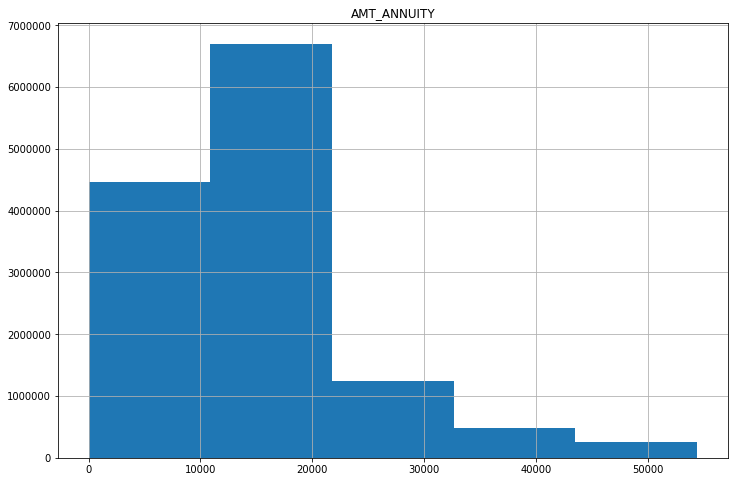

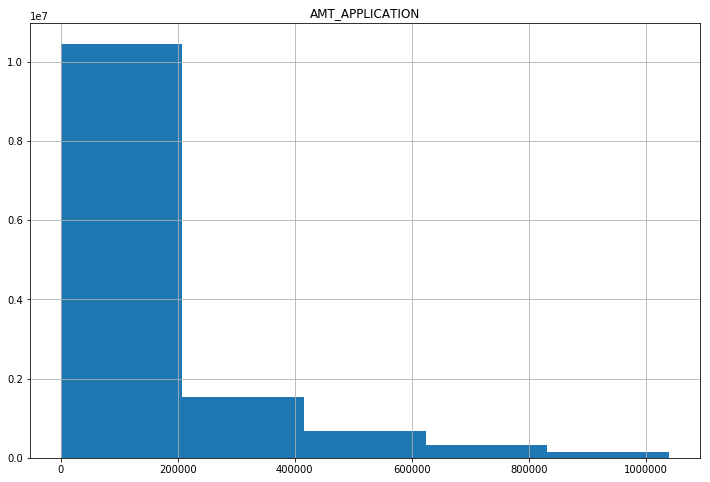

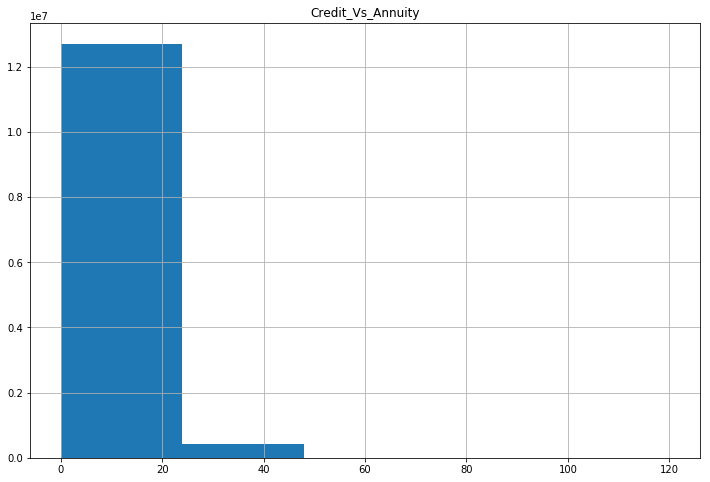

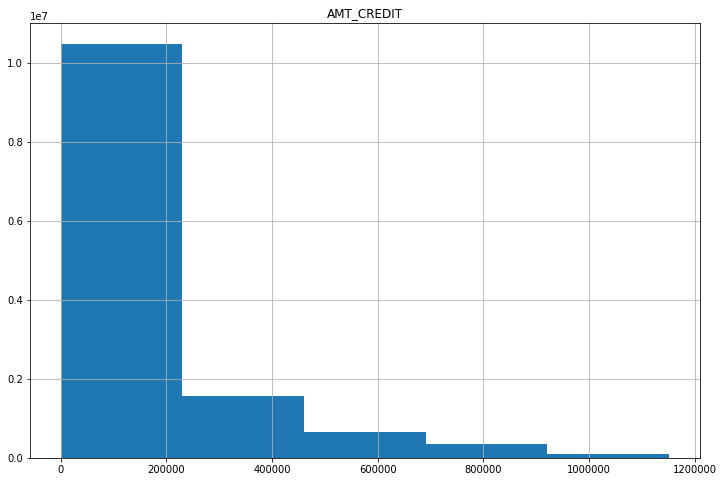

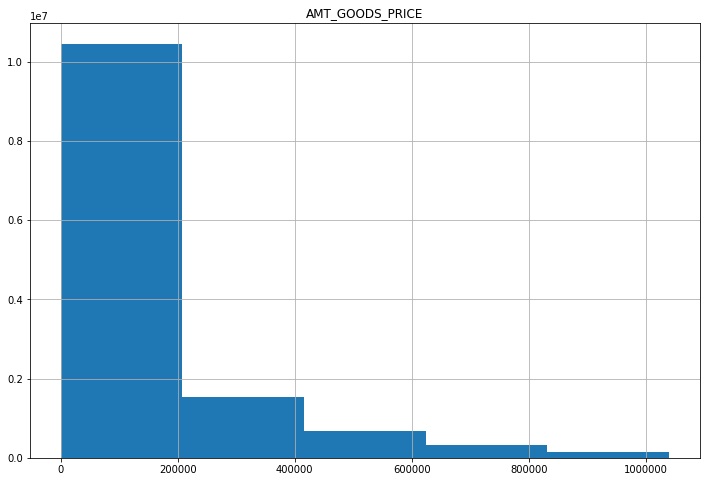

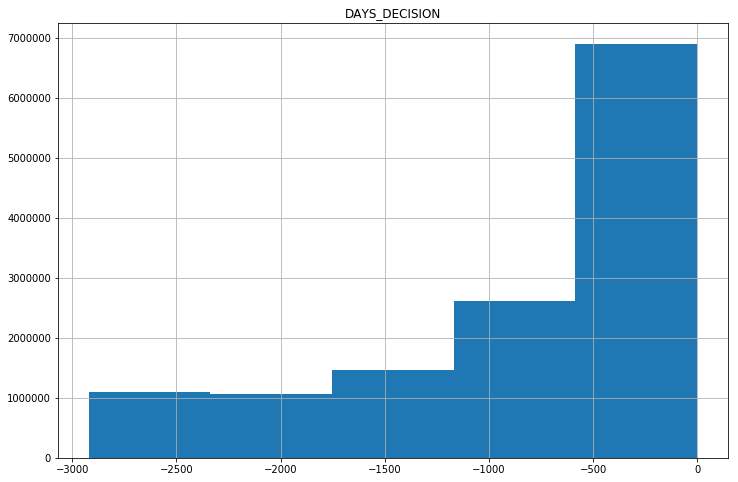

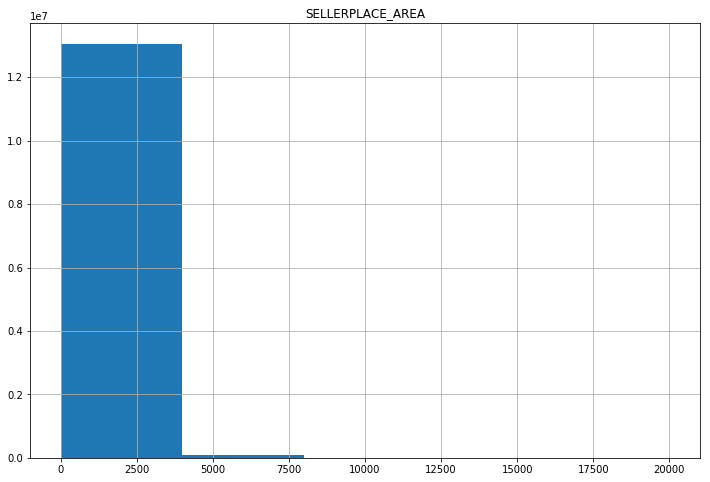

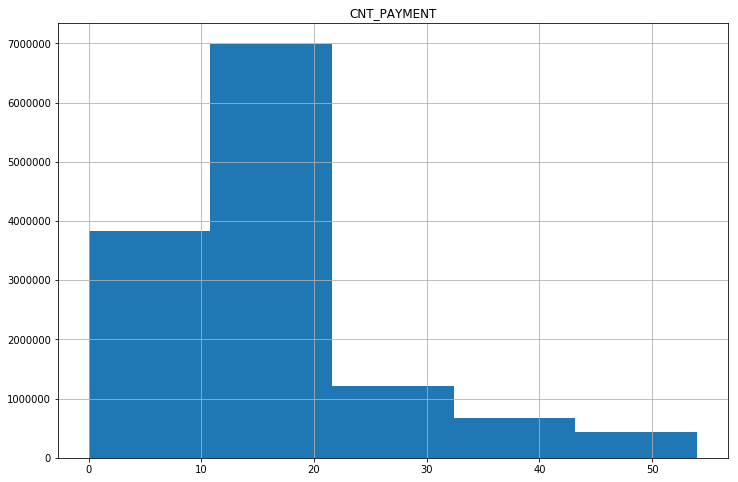

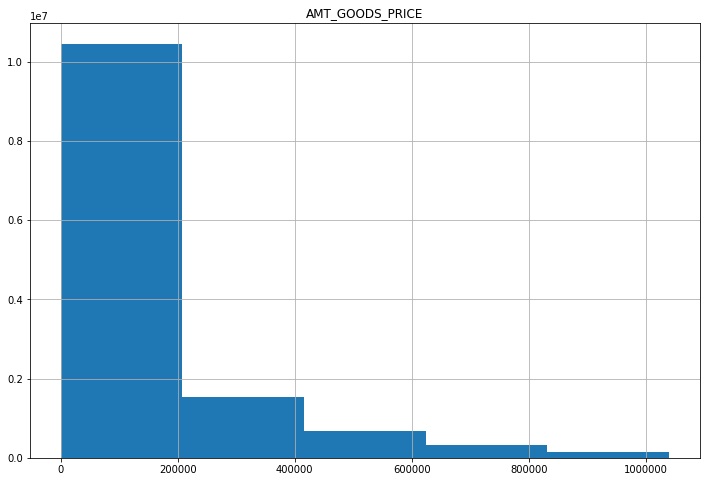

In [41]:
'''
Lets identify some numerical continuous variables, and check their distribution after binning.
It should give us fair idea about will binning be helpful
'''
some_continuous_variables = ["AMT_ANNUITY", "AMT_APPLICATION", "Credit_Vs_Annuity", "AMT_CREDIT", 
                             "AMT_GOODS_PRICE", "DAYS_DECISION", "SELLERPLACE_AREA", 
                             "CNT_PAYMENT", "AMT_GOODS_PRICE"]
for col in some_continuous_variables:
    df_updated.hist(col, bins=5, figsize=(12, 8))

In [42]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13145307 entries, 100001 to 456255
Data columns (total 26 columns):
SK_ID_PREV                     int64
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
HOUR_APPR_PROCESS_START        int64
NFLAG_LAST_APPL_IN_DAY         int64
DAYS_DECISION                  int64
SELLERPLACE_AREA               int64
CNT_PAYMENT                    float64
NAME_SELLER_INDUSTRY           category
NAME_PORTFOLIO                 category
FLAG_LAST_APPL_PER_CONTRACT    category
WEEKDAY_APPR_PROCESS_START     category
NAME_CONTRACT_STATUS           category
CODE_REJECT_REASON             category
CHANNEL_TYPE                   category
NAME_CLIENT_TYPE               category
NAME_CONTRACT_TYPE             category
NAME_PAYMENT_TYPE              category
PRODUCT_COMBINATION            category
NAME_YIELD_GROUP               category
NAME_GOODS_CATEGORY   

In [43]:
df_updated.head()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,NAME_SELLER_INDUSTRY,NAME_PORTFOLIO,FLAG_LAST_APPL_PER_CONTRACT,WEEKDAY_APPR_PROCESS_START,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CHANNEL_TYPE,NAME_CLIENT_TYPE,NAME_CONTRACT_TYPE,NAME_PAYMENT_TYPE,PRODUCT_COMBINATION,NAME_YIELD_GROUP,NAME_GOODS_CATEGORY,NAME_CASH_LOAN_PURPOSE,NAME_PRODUCT_TYPE,Credit_Vs_Annuity
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,1369693,3951.000,24835.5,23787.0,24835.5,13,1,-1740,23,8.0,Connectivity,POS,Y,FRIDAY,Approved,XAP,Country-wide,Refreshed,Consumer loans,Cash through the bank,POS mobile with interest,high,Mobile,XAP,XNA,6.02
100002,1038818,9251.775,179055.0,179055.0,179055.0,9,1,-606,500,24.0,Auto technology,POS,Y,SATURDAY,Approved,XAP,Stone,New,Consumer loans,XNA,POS other with interest,low_normal,Vehicles,XAP,XNA,19.35
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,XNA,Cash,Y,FRIDAY,Approved,XAP,Credit and cash offices,Repeater,Cash loans,XNA,Cash X-Sell: low,low_normal,XNA,XNA,x-sell,10.10
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,Furniture,POS,Y,SUNDAY,Approved,XAP,Stone,Refreshed,Consumer loans,Cash through the bank,POS industry with interest,middle,Furniture,XAP,XNA,10.10
100003,2396755,6737.310,68809.5,68053.5,68809.5,15,1,-2341,200,12.0,Consumer electronics,POS,Y,SATURDAY,Approved,XAP,Country-wide,Refreshed,Consumer loans,Cash through the bank,POS household with interest,middle,Consumer Electronics,XAP,XNA,10.10


In [44]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13145307 entries, 100001 to 456255
Data columns (total 26 columns):
SK_ID_PREV                     int64
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
HOUR_APPR_PROCESS_START        int64
NFLAG_LAST_APPL_IN_DAY         int64
DAYS_DECISION                  int64
SELLERPLACE_AREA               int64
CNT_PAYMENT                    float64
NAME_SELLER_INDUSTRY           category
NAME_PORTFOLIO                 category
FLAG_LAST_APPL_PER_CONTRACT    category
WEEKDAY_APPR_PROCESS_START     category
NAME_CONTRACT_STATUS           category
CODE_REJECT_REASON             category
CHANNEL_TYPE                   category
NAME_CLIENT_TYPE               category
NAME_CONTRACT_TYPE             category
NAME_PAYMENT_TYPE              category
PRODUCT_COMBINATION            category
NAME_YIELD_GROUP               category
NAME_GOODS_CATEGORY   

In [45]:
'''
Lets remove columns which only contain single value
'''''
df_updated = df_updated.loc[:,df_updated.apply(pd.Series.nunique) != 1]

In [46]:
print("Current shape of data frame is ", df_updated.shape)

Current shape of data frame is  (13145307, 25)


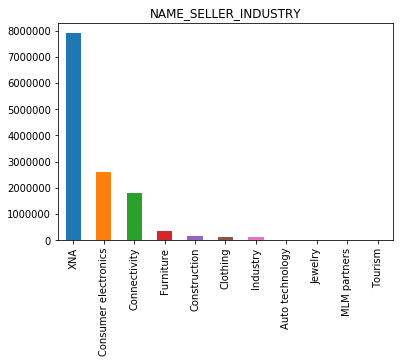

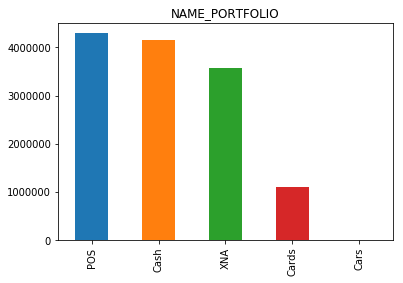

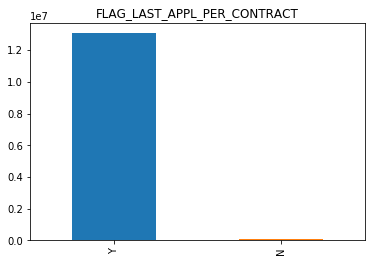

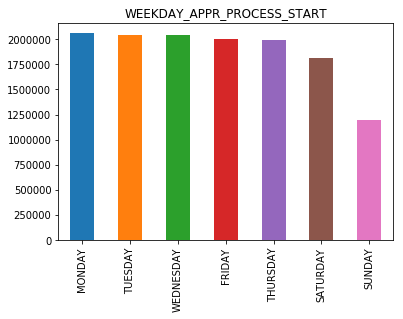

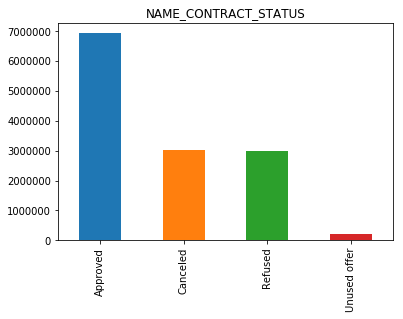

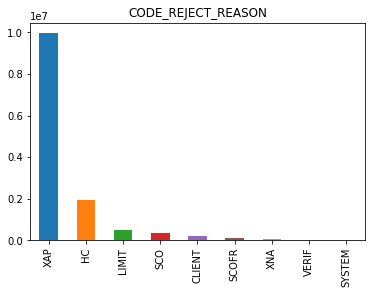

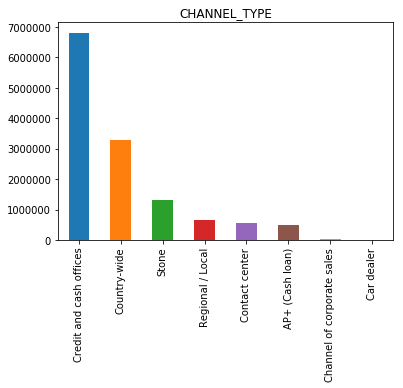

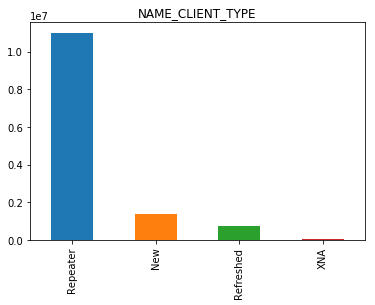

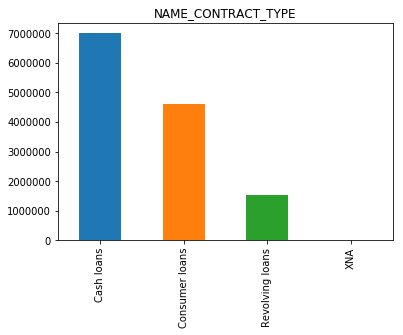

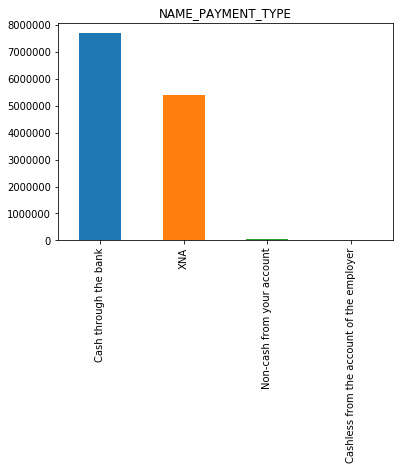

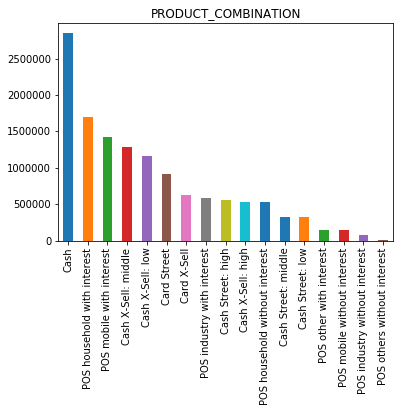

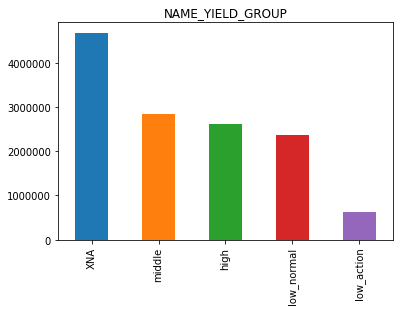

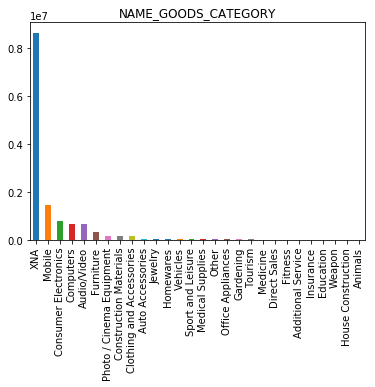

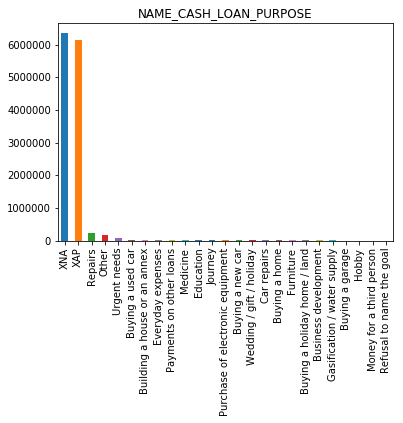

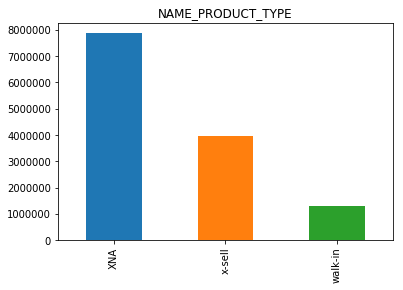

In [47]:
'''
Lets check the frequency of categorical values for df_updated
'''
category=["category"]
for col in df_updated.select_dtypes(include=category).columns:
    df_updated[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()
    
    

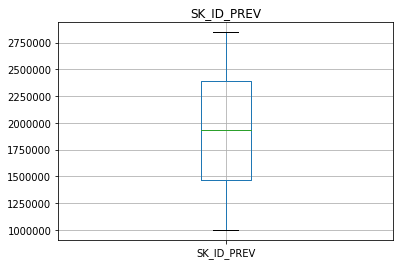

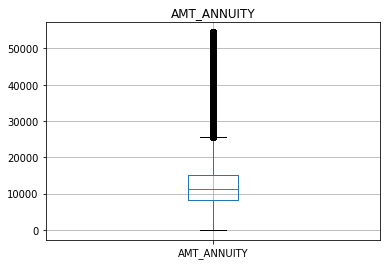

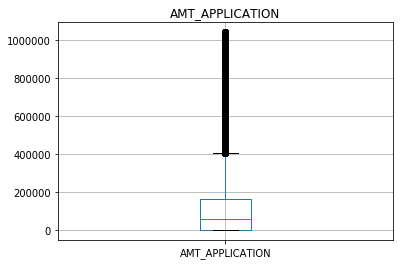

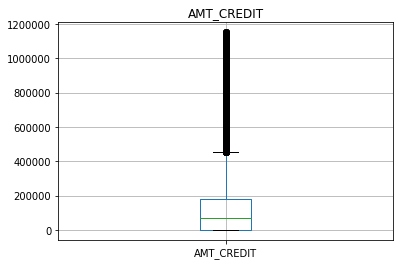

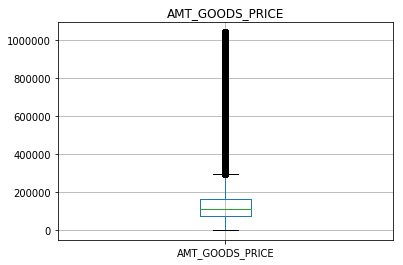

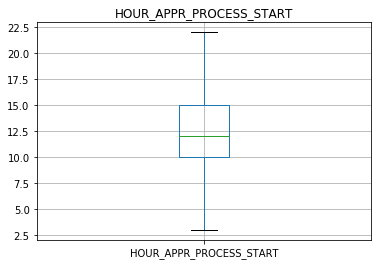

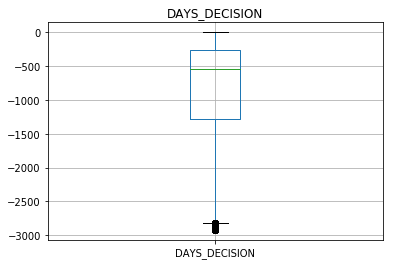

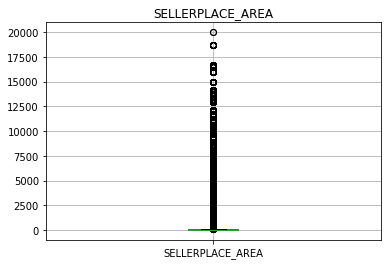

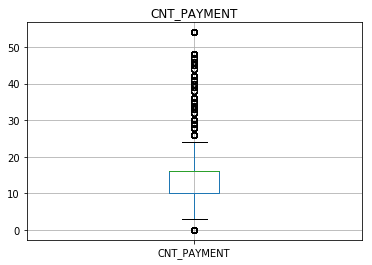

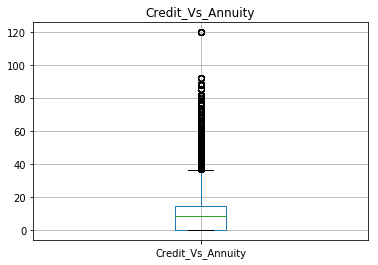

In [48]:
'''
Lets draw boxplots of numeric columns, and find out if dataframe looks good
Lets visualize them
'''
numeric=["float64", "int64"]
for col in df_updated.select_dtypes(include=numeric).columns:
    df_updated.boxplot([col])
    plt.title(col)
    plt.show()


In [53]:
# Lets find out the correlation matrix on the datasets
loan_correlation = df_updated.corr()
loan_correlation

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,Credit_Vs_Annuity
SK_ID_PREV,1.000000,0.004109,-0.003567,-0.003431,0.005719,-0.002411,0.022595,-0.012350,0.012395,-0.014776
AMT_ANNUITY,0.004109,1.000000,0.781048,0.805044,0.819610,-0.033332,0.170760,-0.110525,0.328321,0.274194
AMT_APPLICATION,-0.003567,0.781048,1.000000,0.947478,0.958725,-0.014175,0.049036,-0.040117,0.519283,0.666258
AMT_CREDIT,-0.003431,0.805044,0.947478,1.000000,0.924895,-0.021264,0.047878,-0.057779,0.492524,0.718114
AMT_GOODS_PRICE,0.005719,0.819610,0.958725,0.924895,1.000000,-0.038619,0.187589,-0.105897,0.562063,0.544188
HOUR_APPR_PROCESS_START,-0.002411,-0.033332,-0.014175,-0.021264,-0.038619,1.000000,-0.052715,0.118469,-0.051721,0.013808
DAYS_DECISION,0.022595,0.170760,0.049036,0.047878,0.187589,-0.052715,1.000000,-0.193994,0.203861,-0.128432
SELLERPLACE_AREA,-0.012350,-0.110525,-0.040117,-0.057779,-0.105897,0.118469,-0.193994,1.000000,-0.086694,0.080505
CNT_PAYMENT,0.012395,0.328321,0.519283,0.492524,0.562063,-0.051721,0.203861,-0.086694,1.000000,0.352028
Credit_Vs_Annuity,-0.014776,0.274194,0.666258,0.718114,0.544188,0.013808,-0.128432,0.080505,0.352028,1.000000


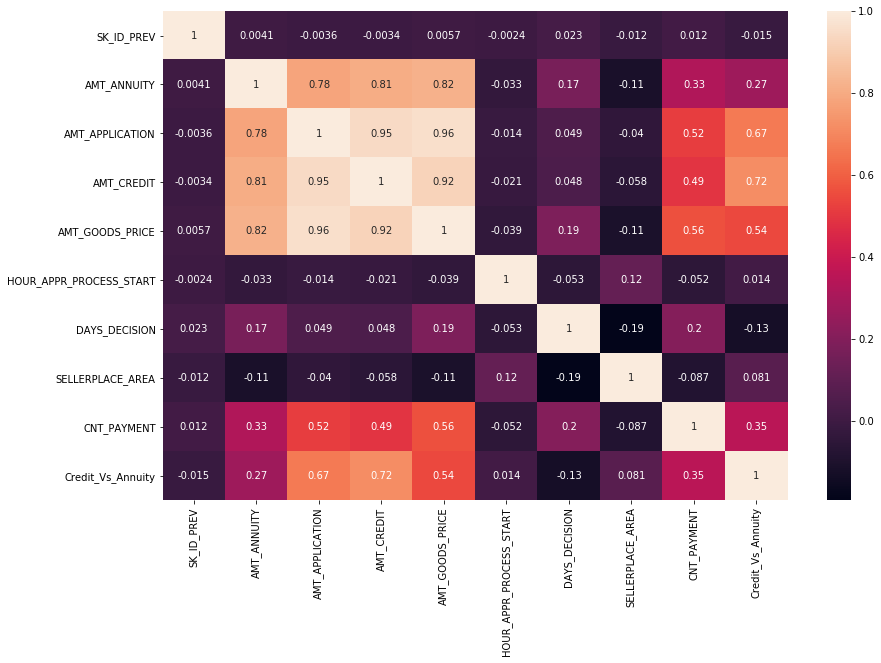

In [54]:
# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

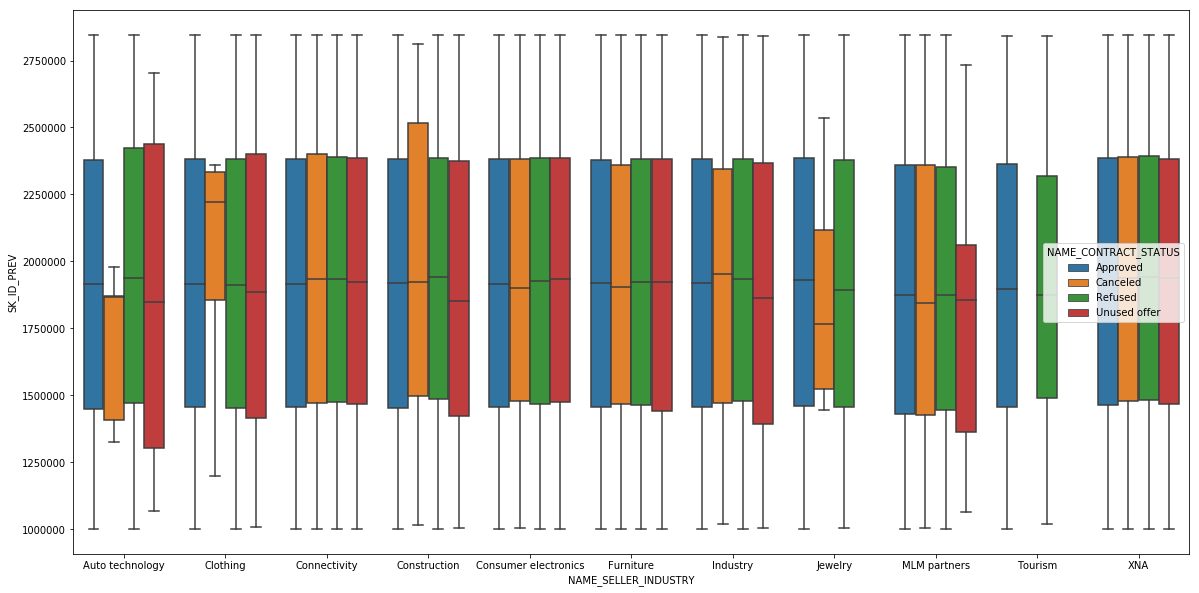

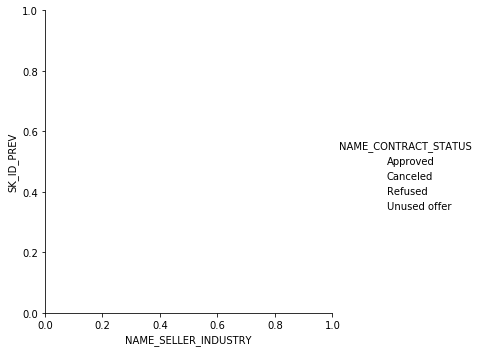

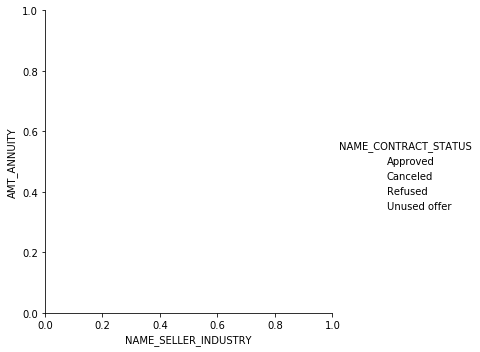

In [ ]:
category=["category"]
numeric=["float64", "int64"]
fig, ax = plt.subplots(figsize=(20, 10))
for category_col in df_updated.select_dtypes(include=category).columns:
    if category_col != "NAME_CONTRACT_STATUS":
        for numeric_col in df_updated.select_dtypes(include=numeric).columns:
            sns.catplot(x=category_col, y=numeric_col, hue="NAME_CONTRACT_STATUS", kind="box", data=df_updated, ax=ax);
            plt.show()